## Model

#### (1) SVM, 
#### (2) Naive Bayer, 
#### (3) XGBooster,
#### (4) Logistic, 
#### (5) Dicision Tree, 
#### (6) K-Nearest Neibor, 
#### (7) Random Forest

In [1]:
import pandas as pd
import numpy as np
# from surprise import Dataset, Reader, SVD
# from surprise.model_selection import train_test_split, cross_validate
# from surprise.accuracy import rmse
import matplotlib.pyplot as plt

In [2]:
review_sentiment_df = pd.read_csv('output/LSTM_predictions.csv')
review_sentiment_df

,Unnamed: 0,location_id,location_name,trip_type,rating,helpful_voting,review_text,actual_sentiment,predicted_sentiment,place_id,place_name,emotion,review_id
0,0,2209612.0,Wat Ratchabophit,Family,5.0,0.0,Besides elegant grand palace and wat pra kaew ...,1,1,P03013220,Bangkok,joy,953596359.0
1,3,2209612.0,Wat Ratchabophit,Couples,5.0,0.0,Wat Ratchabophit is a Buddhist temple located ...,0,0,P03013220,Bangkok,joy,885904967.0
2,8,2273363.0,Wat Rajapradit Sathitmahasimaram Rajaworavihara,NONE,5.0,2.0,One of the least crowded temples but very beau...,0,0,P03013220,Bangkok,love,738692369.0
3,14,311043.0,Wat Phra Chetuphon,Couples,5.0,0.0,"The designs, the Buddhas, and other figures fe...",2,2,P03013220,Bangkok,surprise,962482865.0
4,15,317504.0,Temple Of Dawn (Wat Arun),Couples,5.0,0.0,Probably the best temple in Bangkok.. given th...,0,0,P03013220,Bangkok,joy,962528316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,5900,7726805.0,Wat Prasat Temple,NONE,4.0,11.0,The size is not big. Pillars are well decorate...,2,2,P03013503,Nonthaburi,joy,877979960.0
1779,5902,7726805.0,Wat Prasat Temple,Solo travel,5.0,1.0,Compared to the other temples in the local are...,2,2,P03013503,Nonthaburi,joy,658165922.0
1780,5903,7726805.0,Wat Prasat Temple,Couples,4.0,0.0,Beautiful Lanna architecture and sacred Buddha...,1,1,P03013503,Nonthaburi,joy,591689577.0
1781,5905,1831068.0,Prasat Puay Noi,NONE,3.0,4.0,Prasat Pueai Noi is claimed to be the biggest ...,1,1,P03013503,Nonthaburi,joy,752115552.0


In [3]:
summary_table = review_sentiment_df.groupby('location_name').agg(
    place_name=('place_name', 'first'),
    review_count=('review_id', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

summary_table['average_rating'] = summary_table['average_rating'].round(3)

summary_table = summary_table.sort_values(by=['review_count', 'location_name'], ascending=[False, True])

summary_table


,location_name,place_name,review_count,average_rating
827,Wat Mahathat,Bangkok,8,3.625
894,Wat Phra Singh,Bangkok,7,4.286
660,Tham Khao Luang Cave,Saraburi,5,4.000
722,Wat Pahuaylad Temple,Phetchabun,5,4.200
896,Wat Phra Tat Chom Ping,Sukhothai,5,4.600
...,...,...,...,...
1018,Waterfall Party,Uthai Thani,1,1.000
1019,Weapon Museum,Phetchabun,1,3.000
1020,White Sand Beach Night Food Market,Bangkok,1,4.000
1022,Wong Amat Beach,Nonthaburi,1,4.000


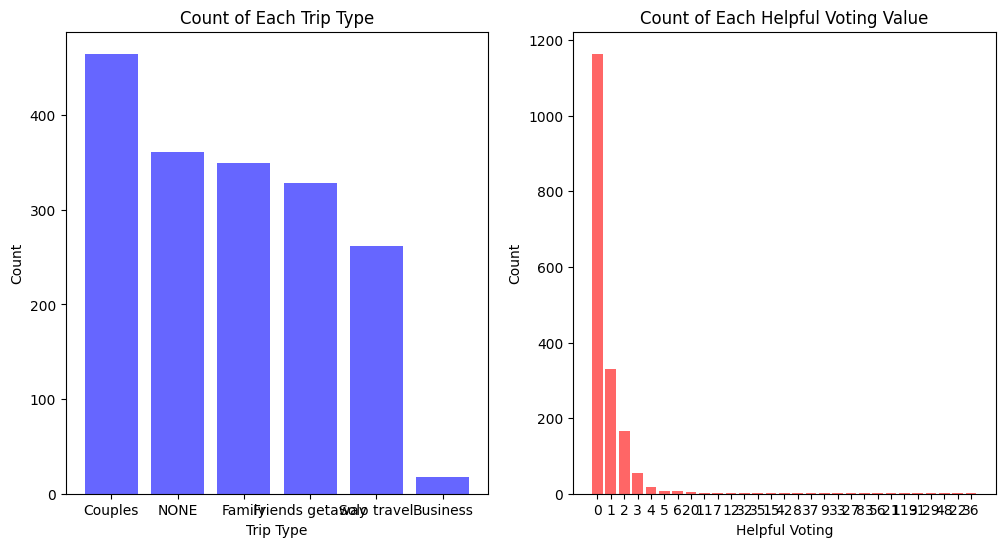

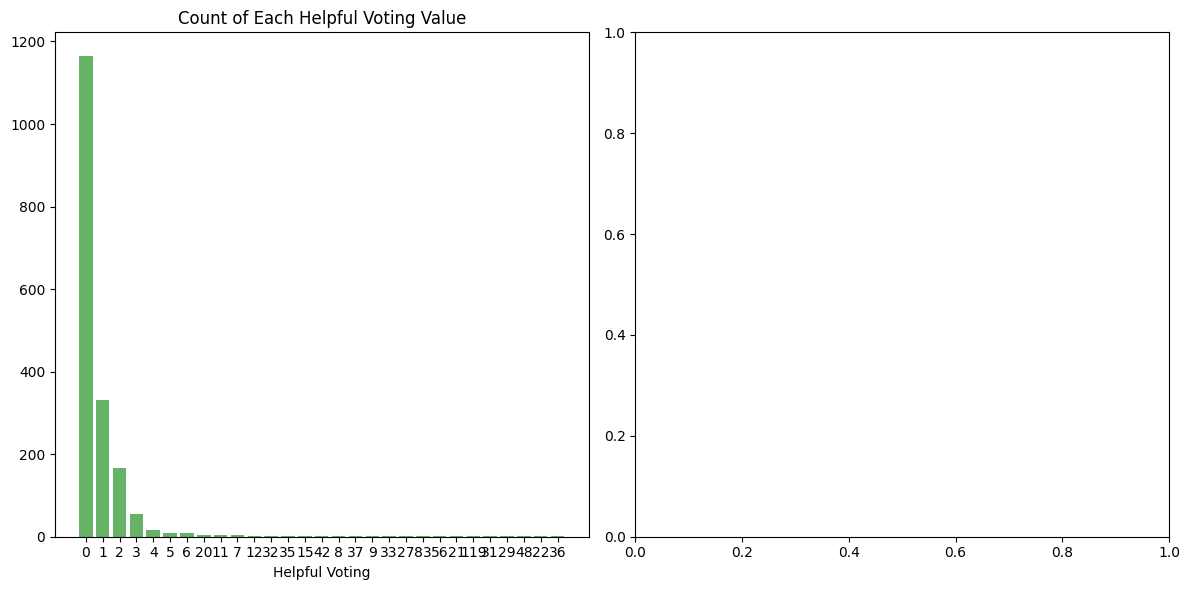

In [4]:
import matplotlib.pyplot as plt


trip_type_counts = review_sentiment_df['trip_type'].value_counts()

helpful_voting_counts = review_sentiment_df['helpful_voting'].astype(int).value_counts()

helpful_voting_counts = review_sentiment_df['helpful_voting'].astype(int).value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(trip_type_counts.index.astype(str), trip_type_counts.values, color='b', alpha=0.6)
ax1.set_xlabel('Trip Type')
ax1.set_ylabel('Count')
ax1.set_title('Count of Each Trip Type')

ax2.bar(helpful_voting_counts.index.astype(str), helpful_voting_counts.values, color='r', alpha=0.6)
ax2.set_xlabel('Helpful Voting')
ax2.set_ylabel('Count')
ax2.set_title('Count of Each Helpful Voting Value')

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))
ax3.bar(helpful_voting_counts.index.astype(str), helpful_voting_counts.values, color='g', alpha=0.6)
ax3.set_xlabel('Helpful Voting')
ax2.set_ylabel('Count')
ax3.set_title('Count of Each Helpful Voting Value')

plt.tight_layout()

plt.show()


In [5]:
print(review_sentiment_df['trip_type'].values)

['Family' 'Couples' 'NONE' ... 'Couples' 'NONE' 'Couples']


In [6]:
review_sentiment_df[["predicted_sentiment", "helpful_voting", "rating", "location_name", "place_name", "review_id"]]

,predicted_sentiment,helpful_voting,rating,location_name,place_name,review_id
0,1,0.0,5.0,Wat Ratchabophit,Bangkok,953596359.0
1,0,0.0,5.0,Wat Ratchabophit,Bangkok,885904967.0
2,0,2.0,5.0,Wat Rajapradit Sathitmahasimaram Rajaworavihara,Bangkok,738692369.0
3,2,0.0,5.0,Wat Phra Chetuphon,Bangkok,962482865.0
4,0,0.0,5.0,Temple Of Dawn (Wat Arun),Bangkok,962528316.0
...,...,...,...,...,...,...
1778,2,11.0,4.0,Wat Prasat Temple,Nonthaburi,877979960.0
1779,2,1.0,5.0,Wat Prasat Temple,Nonthaburi,658165922.0
1780,1,0.0,4.0,Wat Prasat Temple,Nonthaburi,591689577.0
1781,1,4.0,3.0,Prasat Puay Noi,Nonthaburi,752115552.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [8]:
# Step 1: Create a proxy score based on a heuristic formula
# review_sentiment_df['proxy_score'] = (0.5 * review_sentiment_df['rating']) + \
#                                      (0.2 * review_sentiment_df['helpful_voting']) + \
#                                      (0.3 * review_sentiment_df['predicted_sentiment'])

review_sentiment_df['proxy_score'] = (0.3 * review_sentiment_df['rating']) + \
                                     (0.7 * review_sentiment_df['predicted_sentiment'])


# Features and proxy score as target
X = review_sentiment_df[['rating', 'predicted_sentiment', 'helpful_voting']]
y = review_sentiment_df['proxy_score']

# Step 2: Split data into training (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 4: Train the model using proxy scores
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test set: {mse}')

# Step 7: Predict scores for the entire dataset
review_sentiment_df['predicted_score'] = model.predict(X)
print(review_sentiment_df[['location_name', 'place_name', 'predicted_score']])

Mean Squared Error on test set: 1.4884786034588803e-09
                                        location_name  place_name  \
0                                    Wat Ratchabophit     Bangkok   
1                                    Wat Ratchabophit     Bangkok   
2     Wat Rajapradit Sathitmahasimaram Rajaworavihara     Bangkok   
3                                  Wat Phra Chetuphon     Bangkok   
4                           Temple Of Dawn (Wat Arun)     Bangkok   
...                                               ...         ...   
1778                                Wat Prasat Temple  Nonthaburi   
1779                                Wat Prasat Temple  Nonthaburi   
1780                                Wat Prasat Temple  Nonthaburi   
1781                                  Prasat Puay Noi  Nonthaburi   
1782                                  Prasat Puay Noi  Nonthaburi   

      predicted_score  
0            2.199985  
1            1.500004  
2            1.500004  
3            2.89993

In [9]:
import plotly.express as px

In [10]:
# Create scatter plot using Plotly
fig = px.scatter(
    review_sentiment_df, 
    x='place_name', 
    y='predicted_score', 
    color='place_name',  # Optional: to color points by place_name
    hover_data=['location_name'],  # Display location_name when hovering
    title="Scatter Plot of Predicted Scores by Place Name"
)

# Show the plot
fig.show()

In [11]:

# Plot predicted scores against rating
fig1 = px.scatter(
    review_sentiment_df, 
    x='rating', 
    y='predicted_score', 
    title="Predicted Score vs Rating", 
    labels={'rating': 'Rating', 'predicted_score': 'Predicted Score'}
)
fig1.show()

# Plot predicted scores against predicted_sentiment
fig2 = px.scatter(
    review_sentiment_df, 
    x='predicted_sentiment', 
    y='predicted_score', 
    title="Predicted Score vs Predicted Sentiment", 
    labels={'predicted_sentiment': 'Predicted Sentiment', 'predicted_score': 'Predicted Score'}
)
fig2.show()

# Plot predicted scores against helpful_voting
fig3 = px.scatter(
    review_sentiment_df, 
    x='helpful_voting', 
    y='predicted_score', 
    title="Predicted Score vs Helpful Voting", 
    labels={'helpful_voting': 'Helpful Voting', 'predicted_score': 'Predicted Score'}
)
fig3.show()

In [12]:
len(list(set(review_sentiment_df['place_name'].values)))

17

In [13]:
def get_best_location_in_place(place_name):
    place_df = review_sentiment_df[review_sentiment_df['place_name'] == place_name]
    best_location = place_df.loc[place_df['predicted_score'].idxmax()]
    return best_location['location_name'], best_location['predicted_score']

def suggest_locations_in_other_places(exclude_place_name, top_n=3):
    other_places_df = review_sentiment_df[review_sentiment_df['place_name'] != exclude_place_name]
    top_suggestions = other_places_df.sort_values(by='predicted_score', ascending=False).head(top_n)
    return top_suggestions[['location_name', 'place_name', 'predicted_score']]

In [14]:
place_name = 'Bangkok'

best_location, best_score = get_best_location_in_place(place_name)
print(f">>>> Best location in {place_name}: {best_location} with a score of {best_score}")

suggestions = suggest_locations_in_other_places(place_name, top_n=5)
print(f"\n>>>> Suggestions in other places:\n")
suggestions

>>>> Best location in Bangkok: Wat Phra Chetuphon with a score of 2.899937152862549

>>>> Suggestions in other places:



,location_name,place_name,predicted_score
774,Wat Pha Sorn Kaew,Saraburi,2.899937
716,Phra That Cave,Saraburi,2.899937
778,Namtok Ton Nga Chang,Saraburi,2.899937
773,Wat Pra Dhat Pha-Ngao,Saraburi,2.899937
772,Khao Phanom Bencha National Park,Saraburi,2.899937


In [15]:
print(review_sentiment_df[['location_name', 'proxy_score']])

                                        location_name  proxy_score
0                                    Wat Ratchabophit          2.2
1                                    Wat Ratchabophit          1.5
2     Wat Rajapradit Sathitmahasimaram Rajaworavihara          1.5
3                                  Wat Phra Chetuphon          2.9
4                           Temple Of Dawn (Wat Arun)          1.5
...                                               ...          ...
1778                                Wat Prasat Temple          2.6
1779                                Wat Prasat Temple          2.9
1780                                Wat Prasat Temple          1.9
1781                                  Prasat Puay Noi          1.6
1782                                  Prasat Puay Noi          2.6

[1783 rows x 2 columns]


In [16]:
review_sentiment_df[['review_id', 'location_name', 'rating']]

,review_id,location_name,rating
0,953596359.0,Wat Ratchabophit,5.0
1,885904967.0,Wat Ratchabophit,5.0
2,738692369.0,Wat Rajapradit Sathitmahasimaram Rajaworavihara,5.0
3,962482865.0,Wat Phra Chetuphon,5.0
4,962528316.0,Temple Of Dawn (Wat Arun),5.0
...,...,...,...
1778,877979960.0,Wat Prasat Temple,4.0
1779,658165922.0,Wat Prasat Temple,5.0
1780,591689577.0,Wat Prasat Temple,4.0
1781,752115552.0,Prasat Puay Noi,3.0


In [17]:
from surprise import Dataset, Reader, SVD
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(review_sentiment_df[['review_id', 'location_name', 'rating']], reader)


In [18]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.2)

In [19]:
review_sentiment_df.iloc[500:505]

,Unnamed: 0,location_id,location_name,trip_type,rating,helpful_voting,review_text,actual_sentiment,predicted_sentiment,place_id,place_name,emotion,review_id,proxy_score,predicted_score
500,1642,4322525.0,Somdet Phra Srinakarindra Park Roi Et,Family,5.0,0.0,Upon looking around I was the only foriegn per...,2,2,P03013758,Phra Nakhon Si Ayutthaya,joy,724240266.0,2.9,2.899937
501,1643,4322525.0,Somdet Phra Srinakarindra Park Roi Et,Couples,4.0,0.0,A very nice & tranquil park & lake in the cent...,1,1,P03013758,Phra Nakhon Si Ayutthaya,joy,670453326.0,1.9,1.900012
502,1650,1754561.0,Wat Ram Poeng,Solo travel,5.0,0.0,"Vipassana meditation here is a life changing, ...",2,2,P03013530,Phra Nakhon Si Ayutthaya,joy,902372464.0,2.9,2.899937
503,1654,1754561.0,Wat Ram Poeng,Solo travel,5.0,3.0,"I've come here for a 10 day course twice, 6 ye...",2,2,P03013530,Phra Nakhon Si Ayutthaya,joy,729759013.0,2.9,2.899937
504,1655,7117174.0,Wat Khun Thai Tha Ram Temple,Friends getaway,5.0,0.0,Awesome! Many great paintings to see. Many sto...,0,0,P03013530,Phra Nakhon Si Ayutthaya,joy,466706644.0,1.5,1.500004


In [20]:
model = SVD()
model.fit(trainset)

# Step 5: Get predictions for the test set
predictions = model.test(testset)
print(f"Collaborative Filtering RMSE: {accuracy.rmse(predictions)}")

# Step 6: Collaborative Filtering predictions for a specific review-item pair
review_id = 765890432
item_id = 'Khao Yoi Cave'
collab_pred = model.predict(review_id, item_id).est
print(f"Collaborative Filtering prediction for Review {review_id} on {item_id}: {collab_pred}")

RMSE: 0.9155
Collaborative Filtering RMSE: 0.9155255800867431
Collaborative Filtering prediction for Review 765890432 on Khao Yoi Cave: 4.144004242340179


In [21]:
# Define weights for each method
collab_weight = 0.6
content_weight = 0.4

# Get the content-based score for a specific item (e.g., 'Wat Pho')
content_pred = review_sentiment_df[review_sentiment_df['location_name'] == item_id]['proxy_score'].values[0]

# Combine both scores into a final hybrid score
hybrid_score = (collab_weight * collab_pred) + (content_weight * content_pred)

print(f"Hybrid Recommendation Score for {review_id} on {item_id}: {hybrid_score} of 5")


Hybrid Recommendation Score for 765890432 on Khao Yoi Cave: 3.3664025454041075 of 5


## หลักการ
ระบบแนะนำแบบไฮบริดเป็นการผสมผสานระหว่าง **Collaborative Filtering (CF)** และ **Content-Based Filtering (CBF)** เพื่อใช้ประโยชน์จากทั้งสองวิธี:

- **Collaborative Filtering (CF)**: วิเคราะห์พฤติกรรมการให้คะแนนของผู้ใช้ที่คล้ายกัน เพื่อแนะนำสถานที่ที่ผู้ใช้อาจจะชอบ
- **Content-Based Filtering (CBF)**: วิเคราะห์คุณลักษณะของสถานที่ เช่น ความรู้สึกในการรีวิว (sentiment) หรือจำนวนการโหวต (helpful voting) เพื่อแนะนำสถานที่ที่มีลักษณะคล้ายกับที่ผู้ใช้เคยชอบ

## การคำนวณ
คะแนนไฮบริดคำนวณจากการถ่วงน้ำหนักระหว่าง CF และ CBF โดยใช้สูตร:

$$ 
\text{Hybrid Score} = (\text{Weight}_{CF} \times \text{CF Score}) + (\text{Weight}_{CBF} \times \text{CBF Score}) 
$$

ซึ่ง **Weight** จะถูกกำหนดตามความสำคัญของแต่ละโมเดลในระบบ

## การตีความ
- **คะแนนใกล้ 5**: โมเดลคาดว่าผู้ใช้หรือรีวิวนี้น่าจะชอบสถานที่มาก
- **คะแนนใกล้ 1**: โมเดลคาดว่าผู้ใช้ไม่น่าจะชอบสถานที่นั้น
- **คะแนนกลางๆ**: ผู้ใช้อาจรู้สึกกลางๆ กับสถานที่นั้น

คะแนนนี้สามารถนำไปใช้เพื่อจัดลำดับความสำคัญในการแนะนำสถานที่ต่างๆ ให้กับผู้ใช้ตามความชอบที่คาดการณ์


In [22]:
def recommend_top5_locations(review_id, svd_model, review_sentiment_df, content_weights=(0.4, 0.3, 0.3), cf_weight=0.6, cbf_weight=0.4):
    """
    Recommend the top 5 locations that the user (review_id) might like based on hybrid recommendation.

    Parameters:
    review_id (int): The review ID for which to recommend locations.
    svd_model (SVD): The trained SVD collaborative filtering model.
    review_sentiment_df (pd.DataFrame): The DataFrame containing review data and content features.
    content_weights (tuple): Weights for content-based features (rating, helpful_voting, predicted_sentiment).
    cf_weight (float): Weight for collaborative filtering score.
    cbf_weight (float): Weight for content-based filtering score.

    Returns:
    pd.DataFrame: Top 5 recommended locations with their hybrid scores.
    """
    # Get the list of all locations
    all_locations = review_sentiment_df['location_name'].unique()
    
    # Get the locations that the user (review_id) has already reviewed
    reviewed_locations = review_sentiment_df[review_sentiment_df['review_id'] == review_id]['location_name'].unique()
    
    # Filter out locations that the user has already reviewed
    locations_to_recommend = [loc for loc in all_locations if loc not in reviewed_locations]
    
    recommendations = []

    # Normalize content features to avoid domination by one feature
    min_rating = review_sentiment_df['rating'].min()
    max_rating = review_sentiment_df['rating'].max()
    min_helpful = review_sentiment_df['helpful_voting'].min()
    max_helpful = review_sentiment_df['helpful_voting'].max()
    min_sentiment = review_sentiment_df['predicted_sentiment'].min()
    max_sentiment = review_sentiment_df['predicted_sentiment'].max()

    for location in locations_to_recommend:
        # Step 1: Collaborative Filtering (CF) Score
        try:
            cf_score = svd_model.predict(review_id, location).est
        except:
            cf_score = 0  # In case prediction fails for any reason
        
        # Step 2: Content-Based Filtering (CBF) Score
        location_data = review_sentiment_df[review_sentiment_df['location_name'] == location].iloc[0]
        
        # Normalize the content-based features to a 0-1 scale
        normalized_rating = (location_data['rating'] - min_rating) / (max_rating - min_rating)
        normalized_helpful = (location_data['helpful_voting'] - min_helpful) / (max_helpful - min_helpful)
        normalized_sentiment = (location_data['predicted_sentiment'] - min_sentiment) / (max_sentiment - min_sentiment)
        
        cbf_score = (
            content_weights[0] * normalized_rating +
            content_weights[1] * normalized_helpful +
            content_weights[2] * normalized_sentiment
        )
        
        # Step 3: Hybrid Score (weighted combination of CF and CBF scores)
        hybrid_score = (cf_weight * cf_score) + (cbf_weight * cbf_score)
        
        # Append the location and the hybrid score to the list
        recommendations.append((location, hybrid_score))
    
    # Sort the recommendations by hybrid score in descending order
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
    
    # Convert to DataFrame for easier reading and select top 5
    recommendations_df = pd.DataFrame(recommendations, columns=['location_name', 'hybrid_score'])
    
    return recommendations_df.head(5)


In [23]:
review_sentiment_df[['review_id']].astype(int).iloc[:100].head(10)

,review_id
0,953596359
1,885904967
2,738692369
3,962482865
4,962528316
5,955989676
6,955712588
7,954780612
8,935907604
9,890055418


In [24]:
picked_review_id = 738692369
review_sentiment_df[review_sentiment_df['review_id'] == picked_review_id]

,Unnamed: 0,location_id,location_name,trip_type,rating,helpful_voting,review_text,actual_sentiment,predicted_sentiment,place_id,place_name,emotion,review_id,proxy_score,predicted_score
2,8,2273363.0,Wat Rajapradit Sathitmahasimaram Rajaworavihara,NONE,5.0,2.0,One of the least crowded temples but very beau...,0,0,P03013220,Bangkok,love,738692369.0,1.5,1.500004


In [25]:
# Example usage
top5_recommendations = recommend_top5_locations(review_id=picked_review_id, svd_model=model, review_sentiment_df=review_sentiment_df)
print(top5_recommendations)

                      location_name  hybrid_score
0         Asia Blue - Thong Nai Pan      3.106450
1           Khao San Cooking School      3.052407
2  Khlong Lat Mayom Floating Market      3.050221
3                      Naval Museum      3.043272
4    Boon Lott's Elephant Sanctuary      3.030836


In [26]:
import mlflow
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
FILE_PATH = "../dataset/full_embled_review_combined.csv"

In [28]:
def load_and_prepare_data(file_path):
    """
    Load and prepare data for modeling.
    """
    df = pd.read_csv(file_path)
    
    # Data cleaning and feature engineering (as in the previous steps)
    df.dropna(inplace=True)
    df['sentiment'] = df['sentiment'].map({'positive': 1, 'neutral': 0.5, 'negative': 0})
    df['weighted_rating'] = df['rating'] * df['sentiment'] * df['helpful_vote']
    
    # Features and labels
    X = df[['rating', 'sentiment', 'helpful_vote', 'weighted_rating']]
    y = df['rating']  # Assuming the target is 'rating' in this case
    
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
def objective(trial):
    """
    Optuna objective function for hyperparameter tuning.
    """
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 2, 10)

    # Train-test split
    X_train, X_test, y_train, y_test = load_and_prepare_data(FILE_PATH)

    # Create and train model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)

    # Predict and evaluate
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Log parameters and metrics with MLFlow
    with mlflow.start_run():
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.sklearn.log_model(model, "random_forest_model")
    
    return accuracy

In [30]:
def run_optuna_optimization():
    """
    Run Optuna to optimize hyperparameters.
    """
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20)

    print(f"Best parameters: {study.best_params}")
    print(f"Best accuracy: {study.best_value}")

In [31]:
mlflow.set_experiment("Delta-Project")
run_optuna_optimization()

[I 2024-10-24 10:11:23,091] A new study created in memory with name: no-name-5f6aca94-d3a0-4bc7-9573-8b18bbe63d49
[W 2024-10-24 10:11:23,138] Trial 0 failed with parameters: {'n_estimators': 60, 'max_depth': 8} because of the following error: KeyError('helpful_vote').
Traceback (most recent call last):
  File "/Users/ittichaiboonyarakthunya/Library/Caches/pypoetry/virtualenvs/is-project-thailand-tourism-recommendation-qwL-LsgH-py3.12/lib/python3.12/site-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 153, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 182, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'helpful_vo

KeyError: 'helpful_vote'